# Managing your content
As an organization matures and expands its GIS, users add items of various types and properties with varying relationships to one another. Any administrator must regularly manage items contained in various groups and owned by various users. In this section we demonstrate how to work with individual items in a GIS. This guide shows how to retrieve item properties, delete an existing item, and how to examine relationships between items.

In [2]:
# Import
from arcgis.gis import GIS
# logins:
apl = GIS(url="https://python.playground.esri.com/portal",username='arcgis_python', password='amazing_arcgis_123')
aol = GIS(url="https://arcgis.com/", username='arcgis_python', password="P@ssword123",)
apa =GIS("https://python.playground.esri.com/portal")
aoa =GIS()


<Item title:"USA ZIP Codes (2015)" type:Feature Layer Collection owner:esri_livingatlas>
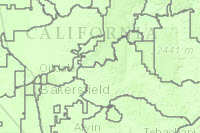

'5203d33eed8b4611859a2d9dca8b604e'

<Item title:"U.S. Postal Point" type:CSV owner:arcgis_python>

'698624ecea2e4bbe967bd127c88cd538'

In [57]:
result = apl.content.search(query="tags:zip*",)
from IPython.display import display
for item in result:
    display(item)
    item.id

In [58]:

#access an Item#access 
zip_item = apl.content.get('698624ecea2e4bbe967bd127c88cd538')
zip_item

<Item title:"U.S. Postal Point" type:CSV owner:arcgis_python>

# update iitem info

In [59]:
# tags
zip_item.tags

['arcgis', 'zip code', 'postal']

In [60]:
# update the tags#
zip_item.update(item_properties={'tags':'postal,zip,national'})

True

In [61]:
# tags
zip_item.tags

['postal', 'zip', 'national']

# download your Item:

<Item title:"China COllege" type:CSV owner:arcgis_python>

'cbe980e8567646398a5a0fa79eb5fc3c'

<Item title:"earthquakes" type:CSV owner:arcgis_python>
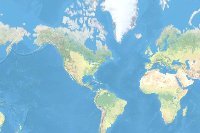

'b9d1241a51a54bbca9085c648b46e78e'

<Item title:"SFPD calls for the year 2016_2" type:CSV owner:arcgis_python>
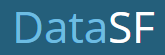

'0455064343aa4068a35e2c8a00de76a0'

<Item title:"SFPD calls for the year 2016" type:CSV owner:arcgis_python>
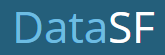

'98118dbefa4b41238cc40833eb558820'

<Item title:"SFPD calls for the year 2018" type:CSV owner:arcgis_python>
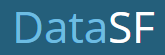

'23eea2dd10da4a50b6032563b254592f'

<Item title:"Ebola_Treatment_Units_Unclassed" type:CSV owner:arcgis_python>

'ae6be1443d644971bbd73a08fecdf76b'

<Item title:"USA Capitals spreadsheet" type:CSV owner:arcgis_python>

'c766e56c866d4851ad4a8df6c8b60424'

<Item title:"Dönerläden.kml" type:CSV owner:arcgis_python>

'fa7e691f5ca14400b5ded6c7b798bc3c'

<Item title:"SFPD calls for the year 2016" type:CSV owner:arcgis_python>
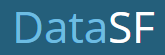

'b4e2067bdfdd494d88fd26f8e91493d9'

<Item title:"USA Capitals spreadsheet UC" type:CSV owner:arcgis_python>

'53f0c894e9a24ddf88f2d35d1675a09a'

In [62]:
result = apl.content.search("",item_type="CSV")
from IPython.display import display
for item in result:
    display(item)
    item.id

In [63]:
#get the item
postal_csv=apl.content.get('698624ecea2e4bbe967bd127c88cd538')
postal_csv

<Item title:"U.S. Postal Point" type:CSV owner:arcgis_python>

In [64]:
#get the csv
postal_csv.get_data()


'C:\\Users\\jeng430\\AppData\\Local\\Temp\\free-zipcode-database.csv'

In [65]:
#Download metadata
postal_csv.download_metadata(save_folder = r'C:\Users\jeng430\Downloads')
#Download Thumbnail
postal_csv.download_thumbnail(save_folder = r'C:\Users\jeng430\Downloads')

In [67]:
#Deleting content
item_for_deletion = apl.content.get('698624ecea2e4bbe967bd127c88cd538')
item_for_deletion

<Item title:"U.S. Postal Point" type:CSV owner:arcgis_python>

In [68]:
# let us protect the ports item we accessed earlier# let u 
item_for_deletion.protect(enable = True)

{'success': True}

In [69]:
item_for_deletion.delete()

Unable to delete item. Delete protection is turned on.


RuntimeError: Unable to delete item. Delete protection is turned on.
(Error Code: 500)

## Finding relationships between items

<Item title:"World Cities" type:Feature Layer Collection owner:esri_livingatlas>
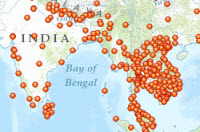

'c38377dbfc0f4c3dba27f9424e3a7f90'

<Item title:"Port to the south of SFO along west coast of USA" type:Feature Collection owner:arcgis_python>

'f779c5f7ca7f4a739c8c0e682485133a'

In [75]:
from IPython.display import display
for item in apl.content.search("Ports"):
    display(item)
    item.id


In [76]:
ports_feature_layer = apl.content.get('f779c5f7ca7f4a739c8c0e682485133a')
ports_feature_layer

<Item title:"Port to the south of SFO along west coast of USA" type:Feature Collection owner:arcgis_python>

In [77]:
ports_feature_layer.related_items('Service2Data', 'forward')

[]

 ### Relationships of web map items


<Item title:"2016 Population Density by Congressional District" type:Feature Layer Collection owner:esri_livingatlas>
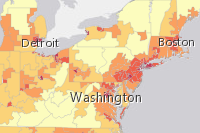

{'list': [], 'start': 1, 'num': 0, 'total': 0, 'nextStart': 1, 'fullCount': 0}

{'list': [], 'start': 1, 'num': 0, 'total': 0, 'nextStart': 1, 'fullCount': 0}

In [93]:
webmap_item = apl.content.get('ff48bbae433442a38f6c635b8c7baf72')
webmap_item
webmap_item.dependent_upon()
webmap_item.dependent_to()

In [97]:
#from the example above, use the item id of first relationship to get the related item
webmap_related_item = apl.content.get('698624ecea2e4bbe967bd127c88cd538')
webmap_related_item
# add a relationship
webmap_item.add_relationship(rel_item= webmap_related_item, rel_type= 'Map2Service')
webmap_item.related_items('Map2Service', 'forward')

<Item title:"U.S. Postal Point" type:CSV owner:arcgis_python>

You do not have permissions to access this resource or perform this operation.


RuntimeError: You do not have permissions to access this resource or perform this operation.
(Error Code: 403)

### Deleting relationships
You can remove defunct relationships by calling the delete_relationship() method and passing the relationship type and related item.